<a href="https://colab.research.google.com/github/vkodithala/NRG/blob/main/NRG_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
features = []
for col in X.columns:
  print(col)
  features.append(col)
features

Unnamed: 0
TotalC2010
TotalC2011
TotalC2012
TotalC2013
TotalC2014
TotalPrice2010
POPESTIMATE2010
POPESTIMATE2011
POPESTIMATE2012
POPESTIMATE2013
POPESTIMATE2014
TotalPrice2011
RNETMIG2011
RNETMIG2012
RNETMIG2013
RNETMIG2014
TotalPrice2012
TotalPrice2013
TotalPrice2014
AveragePop_2010.2014
AveragePerCapita_2010.2014
efficient
inefficient
average


['Unnamed: 0',
 'TotalC2010',
 'TotalC2011',
 'TotalC2012',
 'TotalC2013',
 'TotalC2014',
 'TotalPrice2010',
 'POPESTIMATE2010',
 'POPESTIMATE2011',
 'POPESTIMATE2012',
 'POPESTIMATE2013',
 'POPESTIMATE2014',
 'TotalPrice2011',
 'RNETMIG2011',
 'RNETMIG2012',
 'RNETMIG2013',
 'RNETMIG2014',
 'TotalPrice2012',
 'TotalPrice2013',
 'TotalPrice2014',
 'AveragePop_2010.2014',
 'AveragePerCapita_2010.2014',
 'efficient',
 'inefficient',
 'average']

1.3.5
Training set shape:  (40, 25)
Testing set shape:  (10, 25)


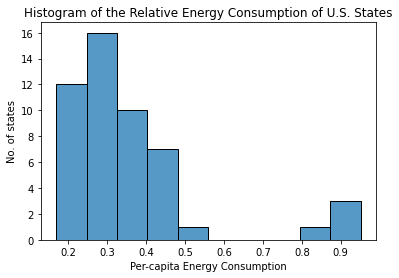

In [ ]:
#step 1 = 
import pandas as pd
print(pd.__version__)

#importing .csv dataset from GitHub to Google Colab
url = 'https://raw.githubusercontent.com/vkodithala/NRG/main/Energy%20Census%20and%20Economic%20Data%20US%202010-2014%202.csv?token=GHSAT0AAAAAAB2CFVCG3K5LQAX5YWQIS3Y4Y2O4URA'
df = pd.read_csv(url)
df

#isolating the features pertinent to our project
relevantdf = df[['StateCodes','TotalC2010', 'TotalC2011','TotalC2012','TotalC2013']]
relevantdf = relevantdf[0:51]
relevantdf

#checking which rows are missing values...
df.isnull().sum()

#dropping irrelevant rows (D.C. and US)
df = df.drop(50)
df = df.drop(51)

#creating population and netmig variables to be called later
pop_2010 = df['POPESTIMATE2010']
pop_2011 = df['POPESTIMATE2011']
pop_2012 = df['POPESTIMATE2012']
pop_2013 = df['POPESTIMATE2012']
pop_2014 = df['POPESTIMATE2012']
netmig_2011 = df['RNETMIG2011']
netmig_2012 = df['RNETMIG2012']
netmig_2013 = df['RNETMIG2013']
netmig_2014 = df['RNETMIG2014']


#dropping irrelevant columns - international & domestic migration rates (have net migration rates)
df = df.drop(['State', 'Region', 'Division', 'Coast', 'Great Lakes', 'RINTERNATIONALMIG2011', 'RINTERNATIONALMIG2012', 'RINTERNATIONALMIG2013', 'RINTERNATIONALMIG2014', 'RDOMESTICMIG2011', 'RDOMESTICMIG2012', 'RDOMESTICMIG2013', 'RDOMESTICMIG2014'], axis = 1)

#dropping irrelevant columns - total energy production & expenditures
df = df.drop(['TotalP2010', 'TotalP2011', 'TotalP2012', 'TotalP2013', 'TotalP2014', 'TotalE2010', 'TotalE2011', 'TotalE2012', 'TotalE2013', 'TotalE2014'], axis = 1)

#dropping all other columns - only reviewing total energy consumption & comparing it with states' populations, net population change, energy price, and region
n = 158
df.drop(columns = df.columns[-n:], axis = 1, inplace = True)
df

#adding back population and netmig columns
df.insert(loc=7, column='POPESTIMATE2010', value=pop_2010)
df.insert(loc=8, column='POPESTIMATE2011', value=pop_2011)
df.insert(loc=9, column='POPESTIMATE2012', value=pop_2012)
df.insert(loc=10, column='POPESTIMATE2013', value=pop_2013)
df.insert(loc=11, column='POPESTIMATE2014', value=pop_2014)
df.insert(loc=13, column='RNETMIG2011', value=pop_2011)
df.insert(loc=14, column='RNETMIG2012', value=pop_2012)
df.insert(loc=15, column='RNETMIG2013', value=pop_2013)
df.insert(loc=16, column='RNETMIG2014', value=pop_2014)

#adding a column that shows the dominant political party in each state; based on party registration or identification % as of 2020, per https://en.wikipedia.org/wiki/Political_party_strength_in_U.S._states
political_party = ['R', 'R', 'R', 'R', 'D', 'D', 'D', 'D', 'R', 'D', 'D', 'R', 'D', 'R', 'D', 'R', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'R', 'R', 'R', 'R', 'D', 'D', 'D', 'D', 'D', 'D', 'R', 'R', 'R', 'D', 'D', 'D', 'R', 'R', 'R', 'R', 'R', 'D','D', 'D', 'R', 'E', 'R']
df.insert(loc=1, column='Dominant_Party', value=political_party)

#converting our cleaned dataset to a .csv file
df.to_csv('clean_NRG_data.csv')
df = pd.read_csv('clean_NRG_data.csv')
df

#importing numpy and ignoring all warning messages
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#creating a column that shows the average per capita energy consumption of all 50 states for the years 2010-2014
df['AverageC_2010.2014'] = (df['TotalC2010'] + df['TotalC2011'] + df['TotalC2012'] + df['TotalC2013'] + df['TotalC2014'])/5
df['AveragePop_2010.2014'] = (df['POPESTIMATE2010'] + df['POPESTIMATE2011'] + df['POPESTIMATE2012'] + df['POPESTIMATE2013'] + df['POPESTIMATE2014'])/5
df['AveragePerCapita_2010.2014'] = (df['AverageC_2010.2014']/df['AveragePop_2010.2014'])

#variable declarations
dataset = df['AveragePerCapita_2010.2014']

#finding the 25th percentile for per capita energy consumption in the years 2010-2014
df_total = dataset
lower_quartile = df_total.quantile(0.25)

#creating a column that shows which states were in the lower quartile for per capita energy consumption for the years 2010-2014
df['efficient'] = 1
df['efficient'].where(dataset <= lower_quartile, 0, inplace=True)

#creating a column that shows which states were in the upper quartile for per capita energy consumption for the years 2010-2014
upper_quartile = df_total.quantile(0.75)
df['inefficient'] = 1
df['inefficient'].where(dataset >= upper_quartile, 0, inplace=True)

#creating a column that shows which states had above avg. efficiency for the years 2010-2014
df['average'] = 1
df['average'].where(dataset < upper_quartile, 0, inplace=True)
df['average'].where(dataset > lower_quartile, 0, inplace=True)
df

#importing matplotlib and seaborn for later usage
import matplotlib.pyplot as plt
import seaborn as sns

#creating a histogram using seaborn
totalc = df['AveragePerCapita_2010.2014']
sns.histplot(totalc).set(xlabel = "Per-capita Energy Consumption", ylabel = "No. of states", title = "Histogram of the Relative Energy Consumption of U.S. States")

#setting up train-test split
from sklearn.model_selection import train_test_split
df_usable = df.drop(columns = ['StateCodes', 'Dominant_Party'])
X = df_usable.drop(columns = ['AverageC_2010.2014'])
y = df_usable['AverageC_2010.2014']
X_train, X_test, y_train, y_rem = train_test_split(X, y, test_size = 0.2, shuffle = True)
print('Training set shape: ', X_train.shape)
print('Testing set shape: ', X_test.shape)

#scale the data such that mean = 0 and variance = 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_df = pd.DataFrame(data = principal_components, columns = ['component_1', 'component_2'])
principal_df

,component_1,component_2
0,-4.476964e+06,7.897719e+05
1,-1.769466e+07,3.049737e+05
2,-1.048861e+07,7.360391e+05
3,5.134380e+05,-1.977351e+06
4,1.007547e+08,-5.489458e+06
5,-3.572320e+06,-3.857014e+05
6,-8.740917e+06,-1.088597e+06
7,-1.726563e+07,-6.048634e+05
8,4.129898e+07,-2.608534e+06
9,1.165930e+07,3.385980e+04


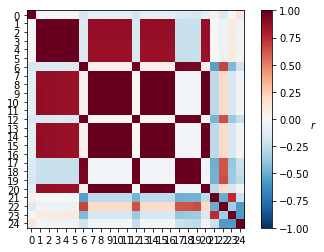

In [ ]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X.T), cmap='RdBu_r', vmin=-1, vmax=1)
ax.set_xticks([i for i in range(25)])
ax.set_yticks([i for i in range(25)])

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
plt.show()